In [5]:
import yaml
import os
import xml.etree.ElementTree as ET
import shutil
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob
import random
import numpy as np

In [3]:
current_dir = os.getcwd()
working_dir = os.path.join(current_dir, 'working')
images_dir = os.path.join(working_dir, 'data', 'Images')
annotations_dir = os.path.join(working_dir, 'data', 'annotations')

os.makedirs(images_dir, exist_ok=True)
os.makedirs(annotations_dir, exist_ok=True)

print("Folders created successfully.")

Folders created successfully.


# CONVERT XML files to YOLO format

In [1]:
from utilities.xml_to_yolo import xml_to_yolo

In [2]:
converter = xml_to_yolo()
data_path = r"C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\data"
converter.main(base_dir=data_path,model='LP',cropp_image='YES')

# START TRAINING

In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [6]:
model = YOLO()

In [7]:
# Define your configuration data as a Python dictionary
config = {
    'path': r'C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\data',
    'train': 'train/images',  # train images (relative to 'path') 4 images
    'val': 'val/images',      # val images (relative to 'path') 4 images
    'nc': 1,                   # Number of classes
    'names': ['license'],         # Class names
}

# Define the file path where you want to save the YAML file
yaml_file_path = r'C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\license_detection_config.yaml'  # Update with your desired path and file name

# Write the YAML data to the file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(config, yaml_file)

print(f"YAML configuration file saved at: {yaml_file_path}")

YAML configuration file saved at: C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\license_detection_config.yaml


In [9]:
results = model.train(data=r'C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\license_detection_config.yaml',
                      epochs=100,
                      imgsz=640,
                      pretrained = True ,
                      name= "LP_model",
                      patience = 35,
                      flipud=0.5,
                      batch = 16,
                      optimizer = 'SGD',
                      lr0 = 0.001,
                      augment = True,
                      device =0,
                      project = r"C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection"
                      )

New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.220 🚀 Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8187MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\license_detection_config.yaml, epochs=100, patience=35, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection, name=LP_model, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False

train: Scanning C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\data\train\labels.cache... 8000 images, 0
val: Scanning C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\data\val\labels.cache... 2000 images, 0 bac


Plotting labels to C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.97G      0.516     0.3069     0.8072         24        640: 100%|██████████| 500/500 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.96G     0.5144      0.305     0.8045         29        640: 100%|██████████| 500/500 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.96G     0.5317     0.3185     0.8092         35        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.96G     0.5305     0.3188     0.8082         34        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.96G     0.5254     0.3175     0.8078         24        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.96G     0.5237     0.3142     0.8082         25        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.96G     0.5249     0.3096     0.8066         19        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.96G     0.5173      0.305     0.8069         26        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.96G     0.5103     0.3035     0.8051         29        640: 100%|██████████| 500/500 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.96G     0.5129     0.3022     0.8056         33        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.96G     0.5059     0.3011     0.8061         28        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.96G     0.5074     0.3011     0.8046         34        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.96G     0.4963     0.2931     0.8055         38        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.96G     0.5031     0.2948     0.8044         30        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.96G     0.4999     0.2929     0.8033         34        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.96G     0.5085     0.2962     0.8047         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.96G     0.4998     0.2905     0.8051         24        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.96G     0.4991      0.289     0.8048         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.96G     0.4956     0.2886     0.8045         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.96G     0.4945     0.2862     0.8039         36        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000      0.999          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.96G     0.4911     0.2851     0.8007         41        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.96G     0.4909     0.2837     0.8029         24        640: 100%|██████████| 500/500 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.96G     0.4835     0.2793      0.802         34        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.96G     0.4839     0.2782     0.8007         29        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.96G     0.4822      0.278     0.8009         24        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.96G     0.4825     0.2769     0.8019         20        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.96G      0.477     0.2741     0.8012         30        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.96G     0.4794     0.2723     0.8039         33        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.96G     0.4772     0.2716     0.8014         26        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.96G     0.4729     0.2706      0.798         33        640: 100%|██████████| 500/500 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.96G     0.4712     0.2693     0.8012         25        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.96G     0.4706     0.2684     0.7992         24        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.96G     0.4722      0.268     0.7979         33        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.96G      0.465     0.2632     0.7992         28        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.96G     0.4673     0.2641     0.7994         38        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.96G      0.465     0.2634     0.7977         26        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.96G     0.4616     0.2596     0.7979         27        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.96G     0.4614     0.2611     0.7995         30        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.96G     0.4612     0.2578     0.7983         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11


                   all       2000       2000          1          1      0.995      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.96G     0.4597     0.2571     0.7968         29        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.96G       0.46     0.2592     0.7975         23        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.96G     0.4617     0.2582     0.7991         38        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.96G     0.4567     0.2554      0.799         33        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.96G     0.4537      0.253     0.7977         35        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.96G     0.4523     0.2524     0.7984         30        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.96G     0.4501     0.2519     0.7964         24        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.96G     0.4529     0.2546     0.7958         34        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.96G     0.4506     0.2521     0.7961         31        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.96G     0.4515     0.2501     0.7997         32        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.96G     0.4447     0.2493     0.7956         24        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.96G     0.4511     0.2499     0.7988         33        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.96G     0.4424     0.2472     0.7948         44        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.96G     0.4446     0.2462     0.7946         36        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.96G     0.4444     0.2467     0.7956         36        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.96G     0.4439     0.2456     0.7962         32        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.96G     0.4408     0.2441     0.7956         23        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.96G     0.4424     0.2436      0.794         21        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.96G     0.4369     0.2421     0.7958         25        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.96G     0.4363     0.2414     0.7941         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.96G     0.4359     0.2415     0.7946         28        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.96G     0.4371     0.2387     0.7958         22        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.96G     0.4336     0.2385      0.794         26        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.96G     0.4353     0.2382     0.7953         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000      0.999          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.96G     0.4339     0.2376     0.7933         36        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.96G     0.4328     0.2368     0.7946         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.96G     0.4293     0.2372     0.7948         22        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.96G     0.4325     0.2355      0.796         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.96G     0.4271     0.2339     0.7939         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.96G     0.4316      0.234     0.7951         34        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.96G     0.4311     0.2343     0.7933         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.96G      0.427      0.232     0.7934         33        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.96G     0.4278     0.2332     0.7932         30        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.96G     0.4254     0.2311     0.7942         21        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.96G     0.4285     0.2321     0.7952         29        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.96G     0.4252     0.2309     0.7933         24        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.96G     0.4256     0.2291     0.7944         38        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.96G     0.4248      0.228     0.7931         32        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.96G     0.4215     0.2266     0.7937         33        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.96G     0.4194     0.2275     0.7917         29        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.96G     0.4184     0.2257     0.7938         26        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.96G     0.4197     0.2263     0.7924         27        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.96G     0.4176     0.2238     0.7917         25        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.96G     0.4182     0.2244     0.7943         34        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.96G     0.4161     0.2222     0.7939         29        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.96G     0.4171     0.2227      0.792         31        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.96G     0.4138     0.2209     0.7928         27        640: 100%|██████████| 500/500 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.96G     0.4156     0.2216     0.7939         22        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.96G     0.4133     0.2205     0.7932         31        640: 100%|██████████| 500/500 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11

                   all       2000       2000          1          1      0.995      0.936
Stopping training early as no improvement observed in last 35 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=35) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



88 epochs completed in 1.559 hours.
Optimizer stripped from C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model\weights\best.pt, 6.2MB

Validating C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model\weights\best.pt...
Ultralytics YOLOv8.0.220 🚀 Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8187MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:14


                   all       2000       2000          1          1      0.995       0.92
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\fabri\Escritorio\ALPR\models\License_plate_detection\LP_model


In [15]:
result = pd.read_csv(r"C:\Users\fabri\Escritorio\ALPR\runs\detect\License_plate_detection3\results.csv")
result.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.89851,1.56260,0.90708,0.99832,0.99450,0.99499,0.80080,0.74247,0.52244,0.84999,0.067066,0.000333,0.000333
1,2,0.73180,0.58118,0.84481,0.99650,0.99746,0.99498,0.81038,0.73920,0.44697,0.84225,0.034059,0.000659,0.000659
2,3,0.69949,0.50360,0.83982,0.99888,0.99800,0.99500,0.84499,0.65160,0.40619,0.82786,0.001046,0.000980,0.000980
3,4,0.66081,0.46269,0.83003,0.99736,1.00000,0.99500,0.86185,0.57661,0.35323,0.81325,0.000970,0.000970,0.000970
4,5,0.63409,0.43192,0.82558,0.99827,0.99900,0.99499,0.86786,0.55648,0.33007,0.80956,0.000970,0.000970,0.000970


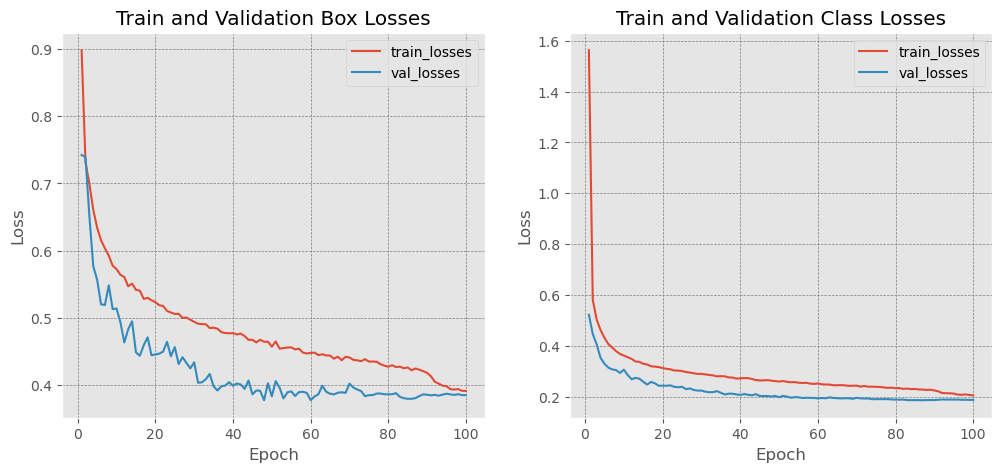

In [19]:
result.columns = result.columns.str.strip()
%matplotlib inline
epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']

plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # You can choose a style you prefer
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

(-0.5, 2399.5, 1199.5, -0.5)

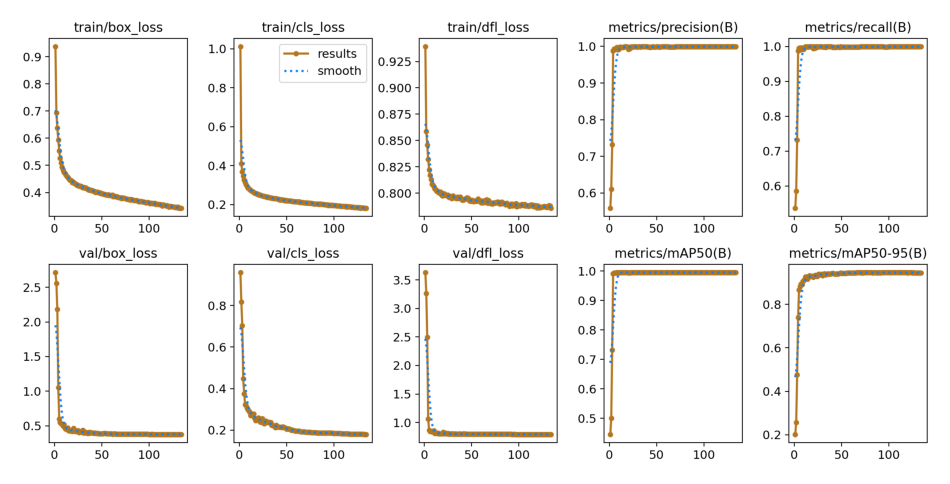

In [22]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread(r"C:\Users\fabri\Escritorio\Fifth_try\LicensePlate_text_extraction\runs\detect\license_plate_small3\results.png"))
plt.axis('off')

# Test the model

In [23]:
model = YOLO(r'C:/Users/fabri/Escritorio/ALPR/runs/detect/License_plate_detection3/weights/best.pt')


image 1/1 C:\Users\fabri\Escritorio\Capstone_Dataset\LPR_LP_Dataset\Images\G1 (228).jpg: 448x640 1 license, 25.0ms
Speed: 3.5ms preprocess, 25.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
**********************
In this image 1 License plate has been detected.
License 1 is: license
Coordinates are: [339.5225524902344, 519.5519409179688, 491.6165466308594, 564.5132446289062]
Confidence is: 0.89
-------

image 1/1 C:\Users\fabri\Escritorio\Capstone_Dataset\LPR_LP_Dataset\Images\G1 (796).jpg: 448x640 1 license, 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
**********************
In this image 1 License plate has been detected.
License 1 is: license
Coordinates are: [215.44346618652344, 502.00360107421875, 358.1840515136719, 542.46435546875]
Confidence is: 0.9
-------

image 1/1 C:\Users\fabri\Escritorio\Capstone_Dataset\LPR_LP_Dataset\Images\G1 (187).jpg: 448x640 1 license, 19.0ms
Speed: 3.0ms preprocess, 19

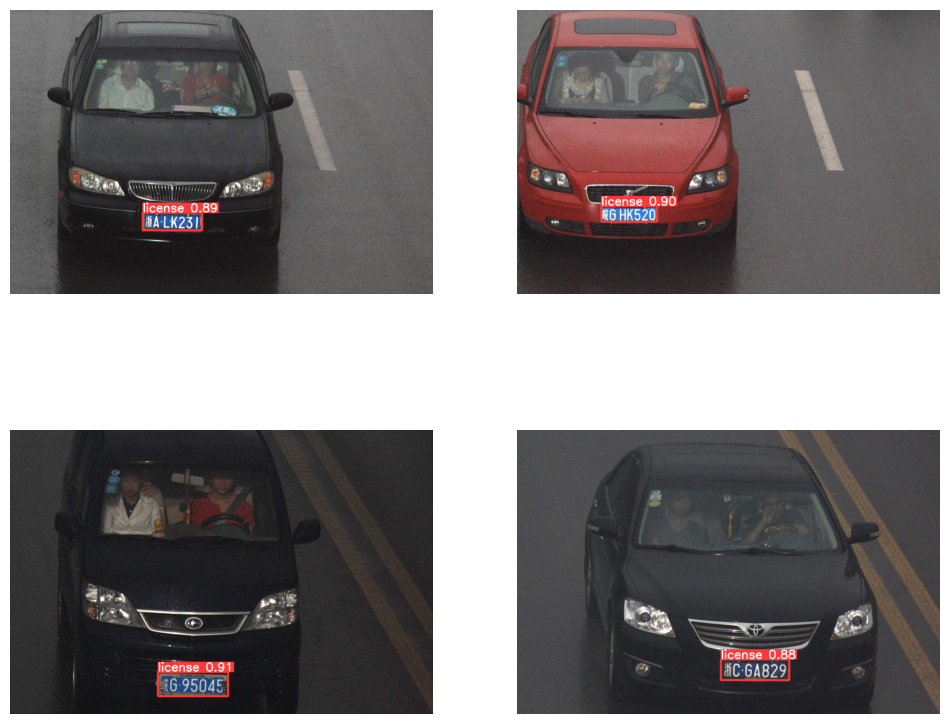

In [34]:
root_path = r'C:\Users\fabri\Escritorio\Capstone_Dataset\LPR_LP_Dataset\Images\*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)
images = []
for i in range(num_samples):
    yolo_outputs = model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    print('**********************')
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'In this image {len(box)} License plate has been detected.')
        print(f'License {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])

plt.figure(figsize=(12,10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off') 